In [26]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import datetime
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # windows
# matplotlib.rcParams['font.family'] = 'AppleGothic'  # Mac
matplotlib.rcParams['font.size'] = 15  # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트 사용시 마이너스 꺠지지않게 해줌

# DF 불러오기

In [27]:
df = pd.read_csv('./after_preprocessing_data/df_all_0629.csv')
df

,자치구,계약일,건물면적(㎡),층,KOSPI종가,Fed기준금리,국제유가(Dubai)($/배럴),부동산거래량,국고채5년(평균),국고채10년(평균),...,BOK기준금리,건물연식,GDP대비가계부채비율,환율종가,선행지수순환변동치,EPU,장단기금리spread,금값종가,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,25,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,18000
1,성동구,2016-01-01,75.37,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,55200
2,금천구,2016-01-01,84.83,3,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,14,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,36800
3,은평구,2016-01-01,101.97,9,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,6,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,67600
4,노원구,2016-01-01,84.59,10,1961.310059,0.34,26.9,9894,1.77,2.03,...,1.50,26,83.3,1175.45,99.6,177.148845,0.14,"1,060.74",0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,18,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.0,250000
536093,송파구,2022-12-31,84.71,11,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,34,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.2,138000
536094,송파구,2022-12-31,84.90,24,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,14,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.0,172000
536095,양천구,2022-12-31,64.02,5,2236.399902,4.10,77.2,3698,3.59,3.54,...,3.25,26,105.0,1260.92,99.1,169.662386,0.39,"1,824.40",0.4,37000


## DF 사전작업
- OLS 기준 최종 컬럼만 남기기

In [28]:
df = df[['자치구','계약일','건물면적(㎡)', '층', 'Fed기준금리',
        '건물연식', 'GDP대비가계부채비율',
        'EPU', '장단기금리spread','LTV', '물건금액(만원)']]

# Train & Test Split


In [29]:
# Train : 2016-2020
# Test : 2021-2022

# 시계열
df['계약일'] = pd.to_datetime(df['계약일'])

train_df = df.loc[df['계약일'] < '2021']
test_df = df.loc[df['계약일'] >= '2021']

In [30]:
df

,자치구,계약일,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV,물건금액(만원)
0,노원구,2016-01-01,39.96,10,0.34,25,83.3,177.148845,0.14,0.7,18000
1,성동구,2016-01-01,75.37,10,0.34,26,83.3,177.148845,0.14,0.7,55200
2,금천구,2016-01-01,84.83,3,0.34,14,83.3,177.148845,0.14,0.7,36800
3,은평구,2016-01-01,101.97,9,0.34,6,83.3,177.148845,0.14,0.7,67600
4,노원구,2016-01-01,84.59,10,0.34,26,83.3,177.148845,0.14,0.7,30300
...,...,...,...,...,...,...,...,...,...,...,...
536092,서초구,2022-12-31,152.33,9,4.10,18,105.0,169.662386,0.39,0.0,250000
536093,송파구,2022-12-31,84.71,11,4.10,34,105.0,169.662386,0.39,0.2,138000
536094,송파구,2022-12-31,84.90,24,4.10,14,105.0,169.662386,0.39,0.0,172000
536095,양천구,2022-12-31,64.02,5,4.10,26,105.0,169.662386,0.39,0.4,37000


In [31]:
X_train = train_df.iloc[ :, 2 : -1]
y_train = train_df.iloc[ :, -1]

In [34]:
X_train

,건물면적(㎡),층,Fed기준금리,건물연식,GDP대비가계부채비율,EPU,장단기금리spread,LTV
0,39.96,10,0.34,25,83.300000,177.148845,0.14,0.7
1,75.37,10,0.34,26,83.300000,177.148845,0.14,0.7
2,84.83,3,0.34,14,83.300000,177.148845,0.14,0.7
3,101.97,9,0.34,6,83.300000,177.148845,0.14,0.7
4,84.59,10,0.34,26,83.300000,177.148845,0.14,0.7
...,...,...,...,...,...,...,...,...
453165,84.30,3,0.09,4,103.933333,107.509687,0.46,0.0
453166,59.98,2,0.09,19,103.933333,107.509687,0.46,0.4
453167,84.21,7,0.09,9,103.933333,107.509687,0.46,0.0
453168,84.69,1,0.09,16,103.933333,107.509687,0.46,0.4


# Scaling

In [36]:
# Train
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
y_train = np.log10(y_train)

# Modeling

## 1. DT

In [57]:
# 랜덤 포레스트 회귀 모델 초기화
model = DecisionTreeRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]

X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)

test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print(f'Test set R2: {model.score(X_test_scaled, y_test_scaled)}')


Test set MSE: 0.022991908668920327
Test set RMSE: 0.15163083020586654
Test set R2: 0.8121397143242219


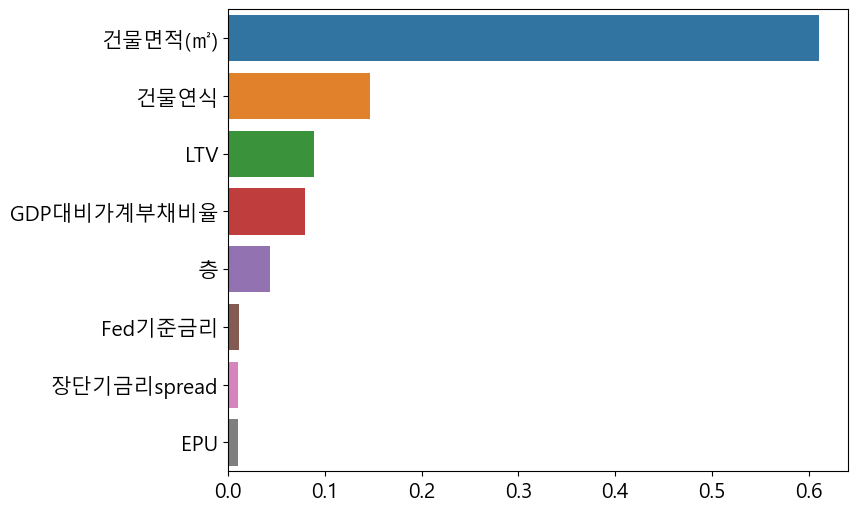

In [58]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show() 

## 2. Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [59]:
# 랜덤 포레스트 회귀 모델 초기화
model = RandomForestRegressor(random_state =1 , n_jobs = -1)

# 모델 학습
model.fit(X_train, y_train)


# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print(f'Test set R2: {model.score(X_test_scaled, y_test_scaled)}')

Test set MSE: 0.012921686819075486
Test set RMSE: 0.11367359772205456
Test set R2: 0.8944206063011275


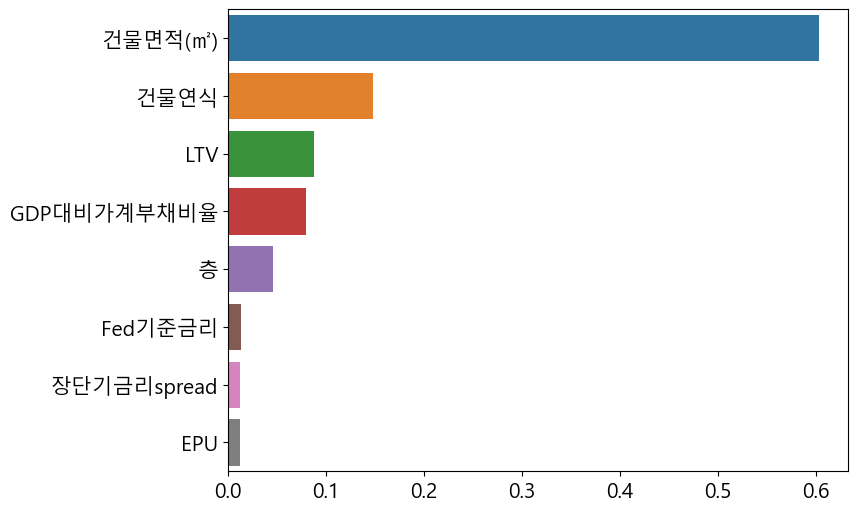

In [60]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show() 

## 3. XG boost

In [54]:
import xgboost as xgb

In [61]:
# 랜덤 포레스트 회귀 모델 초기화
model = xgb.XGBRegressor(random_state =1)

# 모델 학습
model.fit(X_train, y_train)

# Test set에 모델 적용 및 예측 평가
X_test = test_df.iloc[ :, 2 : -1]  # target_column은 예측하고자 하는 종속 변수 컬럼명
y_test = test_df.iloc[ :, -1]
X_test_scaled = scaler.transform(X_test)
y_test_scaled = np.log10(y_test)
test_predictions = model.predict(X_test_scaled)
test_mse = mean_squared_error(y_test_scaled, test_predictions)
print("Test set MSE:", test_mse)
print("Test set RMSE:", np.sqrt(test_mse))
print(f'Test set R2: {model.score(X_test_scaled, y_test_scaled)}')

Test set MSE: 0.012596677198943425
Test set RMSE: 0.11223491969500145
Test set R2: 0.8970761666099557


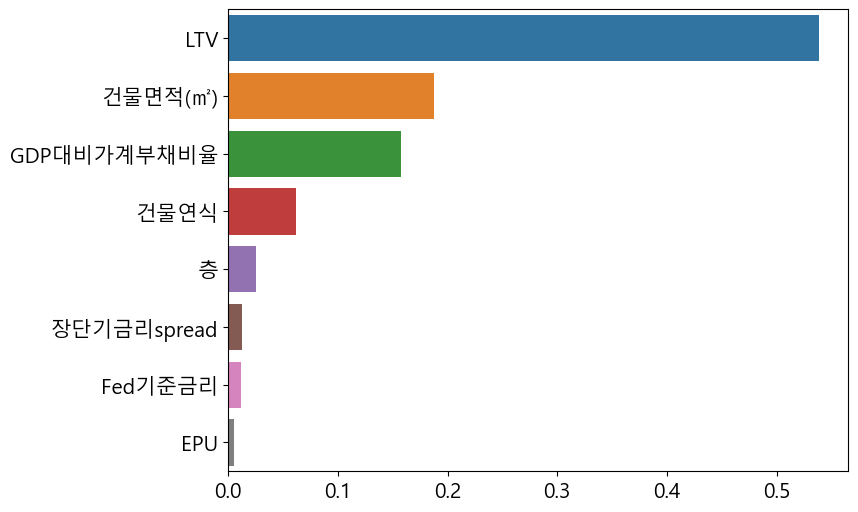

In [62]:
# test_df
importance = model.feature_importances_
# 상위 20개 변수 추출
top_features = pd.Series(importance, index=test_df.iloc[:,2:-1].columns).nlargest(20)
top = top_features.sort_values(ascending=False)[:20]
# 변수 중요도 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x=top, y=top.index)
plt.show() 